In [1]:
import pyportlib

# Portfolio Metrics

Importing TFSA and benchmark

In [2]:
ptf = pyportlib.Portfolio(account='questrade_tfsa', currency="CAD")
benchmark = pyportlib.Portfolio(account='bench_tfsa', currency='CAD')
# refresh_token=""
q = pyportlib.QuestradeConnection(account_name='tfsa')

Updating portfolio data

In [3]:
ptf.update_data(fundamentals_and_dividends=False)
benchmark.update_data(fundamentals_and_dividends=False)
q.update_ptf(ptf)


1 Failed download:
- BPY-UN.TO: No data found, symbol may be delisted


2022-05-22 12:18:24,637:INFO:questrade_tfsa updated: in update_data
2022-05-22 12:18:27,630:INFO:bench_tfsa updated: in update_data
2022-05-22 12:18:29,918:ERROR:FX conversion not supported: in _make_transaction
2022-05-22 12:18:29,919:ERROR:FX conversion not supported: in _make_transaction


Config

In [4]:
figsize = (16, 5)
date = pyportlib.dates_utils.last_bday()
lk="1y"

## Sub-Strategy $\alpha$

In [5]:
active_alpha = pyportlib.stats.alpha(ptf, lookback=lk, tags=["Active"], benchmark=benchmark)
real_estate_alpha = pyportlib.stats.alpha(ptf, lookback=lk, tags=["RealEstate"], benchmark=benchmark)
dividend_alpha = pyportlib.stats.alpha(ptf, lookback=lk, tags=["Dividend"], benchmark=benchmark)

print("Active    : ", round(active_alpha*100, 2), "%")
print("RealEstate: ", round(real_estate_alpha*100, 2), "%")
print("Dividend  : ", round(dividend_alpha*100, 2), "%")

Active    :  3.15 %
RealEstate:  4.87 %
Dividend  :  -6.5 %


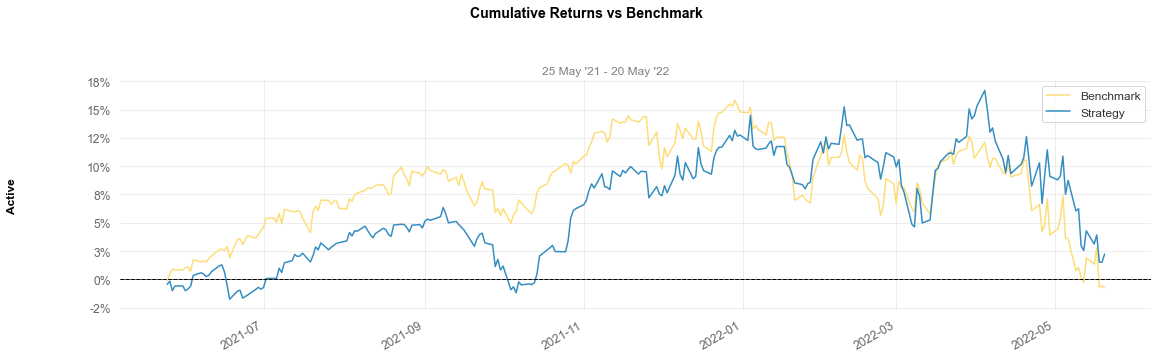

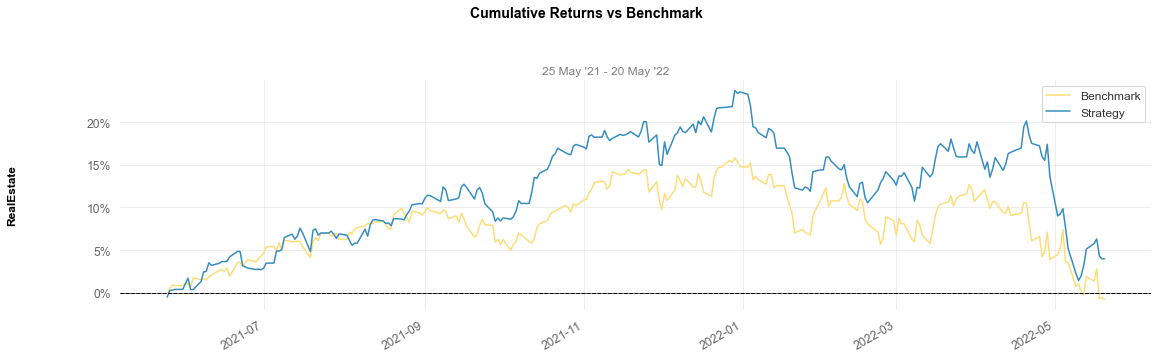

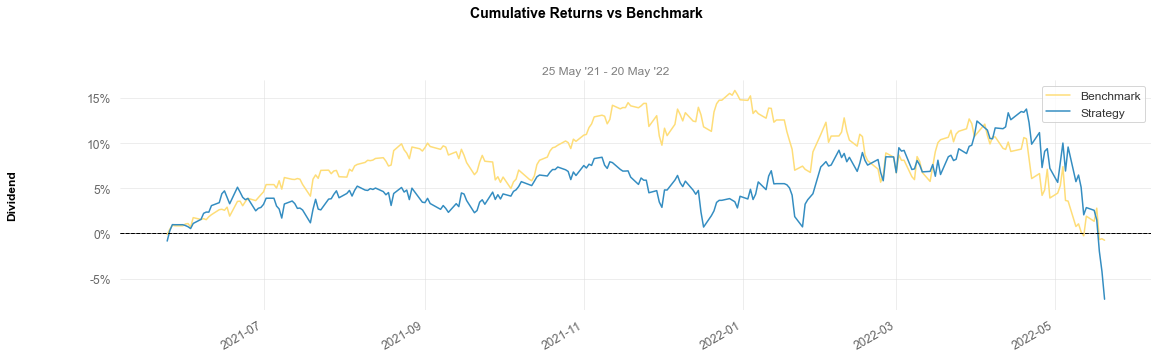

In [6]:
pyportlib.plots.returns(ptf, tags=["Active"], benchmark=benchmark, lookback=lk, ylabel="Active", figsize=figsize)
pyportlib.plots.returns(ptf, tags=["RealEstate"], benchmark=benchmark, lookback=lk, ylabel="RealEstate", figsize=figsize)
pyportlib.plots.returns(ptf, tags=["Dividend"], benchmark=benchmark, lookback=lk, ylabel="Dividend", figsize=figsize)

## Rolling $\sigma$

2022-05-22 12:18:39,464:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


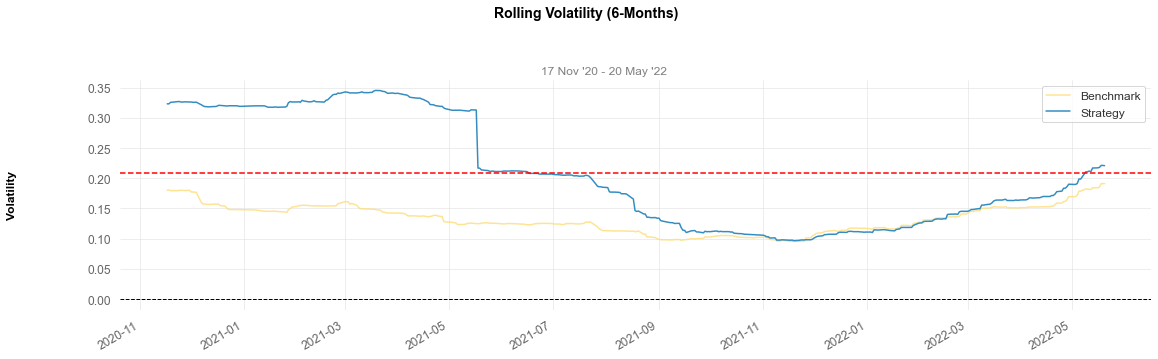

In [7]:
lk = '2y'
pyportlib.plots.rolling_vol(ptf, lookback=lk, benchmark=benchmark, figsize=figsize, include_cash=True)

## Rolling $\beta$

2022-05-22 12:18:41,501:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


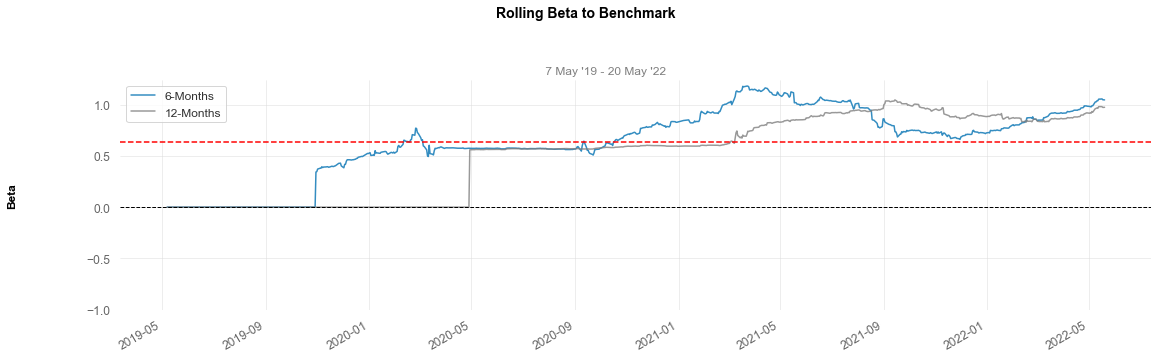

In [8]:
lk = '5y'
pyportlib.plots.rolling_beta(ptf, lookback=lk, benchmark=benchmark, figsize=figsize, include_cash=True)

## Risk


In [9]:
lookback = '1y'
quantile = 0.99
print(f"{lookback} skewness: {pyportlib.stats.skew(ptf, lookback=lookback, include_cash=True)}")
print(f"{lookback} kurtosis: {pyportlib.stats.kurtosis(ptf, lookback=lookback, include_cash=True)}")
print(f"{lookback} vol:      {pyportlib.stats.annualized_volatility(ptf, lookback=lookback, include_cash=True)}")
print(f"{lookback} beta:     {pyportlib.stats.beta(ptf, benchmark=benchmark, lookback=lookback, include_cash=True)}")
print(f"{lookback} VaR{quantile}:  %{100 * pyportlib.stats.value_at_risk(ptf, '1y', quantile=quantile, include_cash=True)}")

1y skewness: -0.6129904397157895
1y kurtosis: 2.9373708145360067
1y vol:      0.17072709358490065
1y beta:     0.98
1y VaR0.99:  %2.5793008014078347


### VaR

In [10]:
lk = "1y"
var99 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.99, include_cash=True) * 100
var975 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.975, include_cash=True) * 100
var95 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.95, include_cash=True) * 100
print("Gaussian VaR")
print(f"VaR   99%: {var99} %")
print(f"VaR 97.5%: {var975} %")
print(f"VaR   95%: {var95} %\n")

var99 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.99, include_cash=True, method="historical") * 100
var975 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.975, include_cash=True, method="historical") * 100
var95 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.95, include_cash=True, method="historical") * 100
print("Historical VaR")
print(f"VaR   99%: {var99} %")
print(f"VaR 97.5%: {var975} %")
print(f"VaR   95%: {var95} %\n")

mkt_val = ptf.market_value.loc[date]
print(f"VaR   99%: {var99/100 * mkt_val}$")
print(f"VaR 97.5%: {var975/100 * mkt_val}$")
print(f"VaR   95%: {var95/100 * mkt_val}$")

Gaussian VaR
VaR   99%: 2.5793008014078347 %
VaR 97.5%: 2.185262402754566 %
VaR   95%: 1.8463676416545498 %

Historical VaR
VaR   99%: 3.1524866978901436 %
VaR 97.5%: 2.5242518584422875 %
VaR   95%: 1.9393837264762386 %

VaR   99%: 532.8058998978994$
VaR 97.5%: 426.62710802440813$
VaR   95%: 327.7777801010478$


## Rolling VaR

2022-05-22 12:18:55,627:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


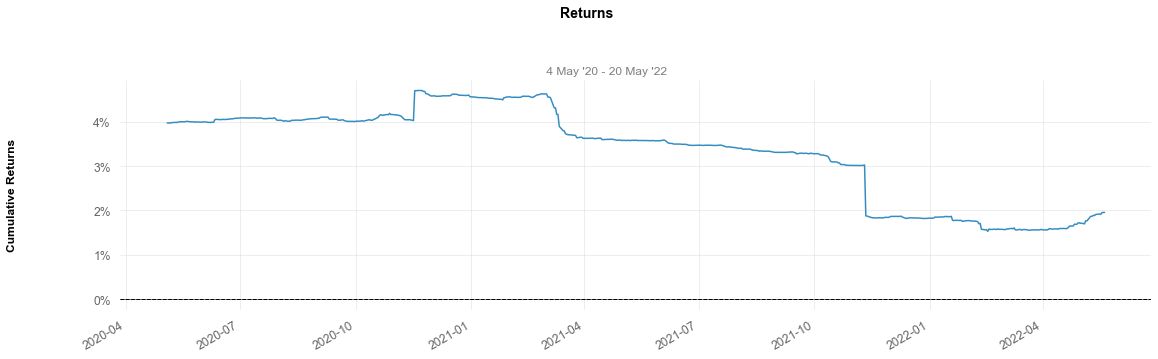

2022-05-22 12:18:57,698:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


<AxesSubplot:title={'center':'Portfolio VaR 1y 95.0% $'}>

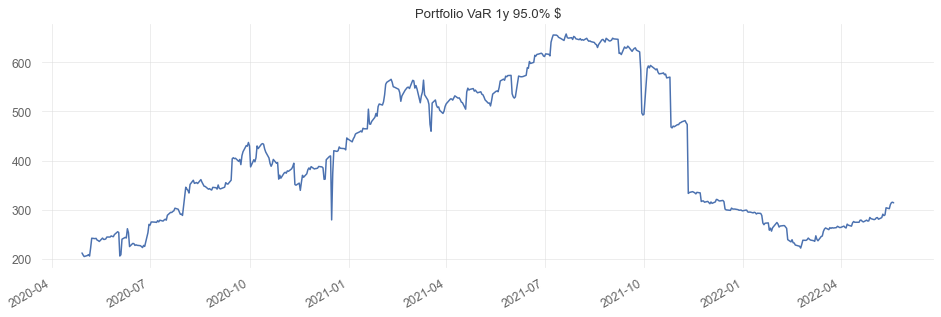

In [11]:
lk = "5y"
quantile = 0.95
pyportlib.plots.rolling_var(ptf, lookback=lk, rolling_period=252, quantile=quantile, figsize=figsize, include_cash=True)
roll_var = pyportlib.stats.rolling_var(ptf, lookback=lk, rolling_period=252, quantile=quantile, include_cash=True)
roll_var = roll_var * ptf.market_value.loc[ptf.market_value.index.isin(roll_var.index)]

roll_var.plot(figsize=figsize, title=f"Portfolio VaR 1y {quantile*100}% $")

### Benchmark Stats

In [12]:
lookback = '1y'
quantile = 0.99
print(f"{lookback} skewness: {pyportlib.stats.skew(benchmark, lookback=lookback)}")
print(f"{lookback} kurtosis: {pyportlib.stats.kurtosis(benchmark, lookback=lookback)}")
print(f"{lookback} vol: {pyportlib.stats.annualized_volatility(benchmark, lookback=lookback)}")
print(f"{lookback} VaR {quantile}: {pyportlib.stats.value_at_risk(benchmark, '1y', quantile=quantile)}")

1y skewness: -0.4744002051705279
1y kurtosis: 1.4235892638856256
1y vol: 0.15069908275510915
1y VaR 0.99: 0.022068824765808306


## Liquidity
### Cash $

<AxesSubplot:title={'center':'Portfolio Cash $ (CAD)'}>

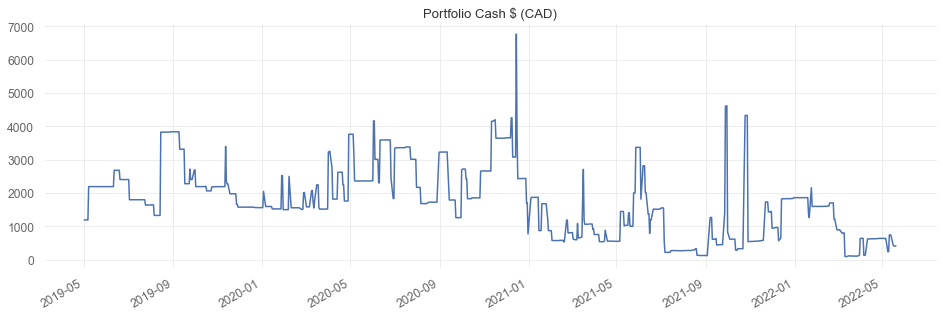

In [13]:
ptf.cash_history.plot(figsize=figsize, title="Portfolio Cash $ (CAD)")

### Market Value

<AxesSubplot:>

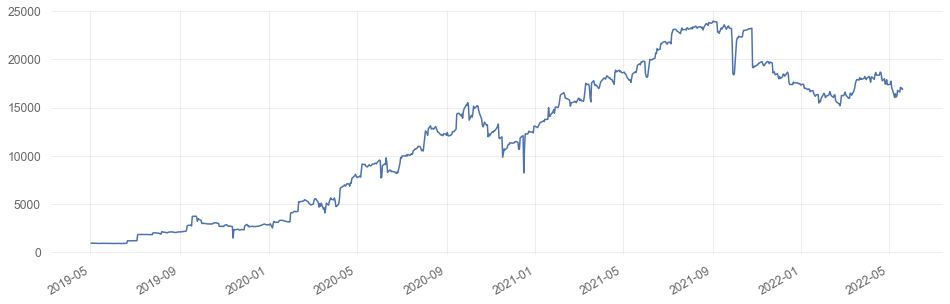

In [14]:
ptf.market_value.plot(figsize=figsize)

### Cash Management Effect

2022-05-22 12:19:02,072:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl
2022-05-22 12:19:03,283:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


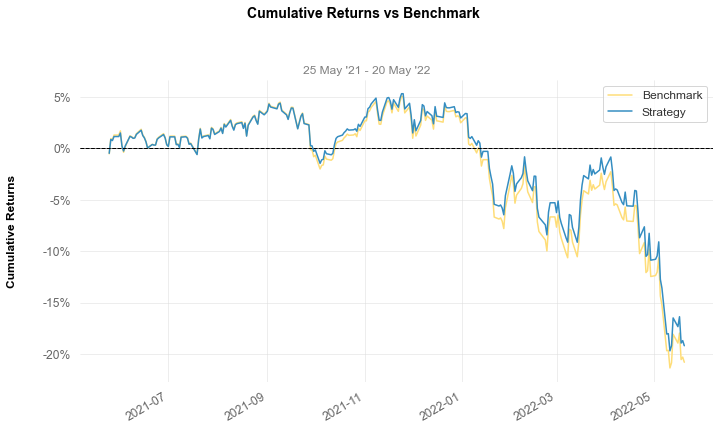

Beta with cash   : 0.98
Beta without cash: 1.03


In [15]:
wcash = ptf.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=True)
ncash = ptf.pct_daily_total_pnl(start_date=ptf.start_date)

lk = "1y"
pyportlib.plots.returns(wcash, benchmark=ncash, lookback=lk)
print(f"Beta with cash   : {round(pyportlib.stats.beta(wcash, benchmark=benchmark, lookback=lk), 2)}")
print(f"Beta without cash: {round(pyportlib.stats.beta(ncash, benchmark=benchmark, lookback=lk), 2)}")

### Portfolio Correlation Clusters
For active position as of {date}

<AxesSubplot:>

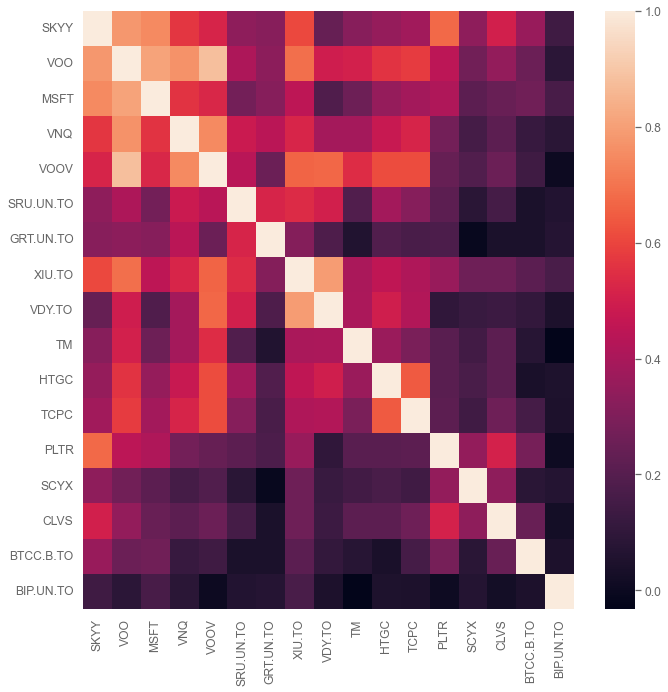

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

corr_mat = pyportlib.stats.cluster_corr(ptf.corr(date=datetime(2022, 3, 11)))

plt.figure(figsize = (11,11))
sns.heatmap(corr_mat)